Exercício 1 — Conceito básico
1.	Explique com suas próprias palavras o que é o algoritmo K-Means.
R: O K-Means é um algoritimo de agrupamento, ele pega o conjunto de dados e cria grupos, que são chamados de clusters.

2.	Por que é necessário escolher o número k antes de rodar o algoritmo?
R: O 'k' é o numero de Clusters, ou seja, quantos grupos vao ser formados.

3.	Em uma dimensão, o que representa o “centroide” de um cluster?
R: O Centroide de um cluster é a media dos valores dentro daquele grupo, tipo, um Cluster x com os valores 20,22,25,27 a media seria +- 23.5. Supondo que os valores referem-se a idades, 23.5 seria a idade media do grupo x.

Exercício 2 — Execução manual
Dado o conjunto de pontos:
X = {2, 4, 5, 10, 12, 20, 25, 30} e k = 3.
1.	Inicialize os centroides com valores iniciais C₁ = 4, C₂ = 12, C₃ = 25.
2.	Atribua cada ponto ao centroide mais próximo.
3.	Calcule os novos centroides (a média dos pontos atribuídos).
4.	Repita o processo até que os centroides não mudem mais.
5.	Mostre o resultado final (os 3 grupos formados e seus centroides).


In [20]:
import numpy as np

x = np.array([2, 4, 5, 10, 12, 20, 25, 30])
k = 3

# Inicialização dos centroides
centroides = np.array([4, 12, 25])

print(f"\nValores de x: {x}")
print(f"Clusters: {k}")
print(f"Centroides iniciais: C1 = {centroides[0]}, C2 = {centroides[1]}, C3 = {centroides[2]}")


Valores de x: [ 2  4  5 10 12 20 25 30]
Clusters: 3
Centroides iniciais: C1 = 4, C2 = 12, C3 = 25


In [22]:
# atribuir cada ponto ao centroide mais próximo
def atribuir_clusters(pontos, centroides):
    clusters = []
    for ponto in pontos:
        distancias = [abs(ponto - centroide) for centroide in centroides]
        cluster_mais_proximo = np.argmin(distancias)
        clusters.append(cluster_mais_proximo)
    return np.array(clusters)

# calcular novos centroides
def calcular_centroides(pontos, clusters, k):
    newCentroide = []
    for i in range(k):
        pontos_do_cluster = pontos[clusters == i]
        if len(pontos_do_cluster) > 0:
            newCentroide.append(np.mean(pontos_do_cluster))
        else:
            newCentroide.append(centroides[i])
    return np.array(newCentroide)

# K-Means iterativo
iteracao = 0
max_iteracoes = 10
centroides_anteriores = None

while iteracao < max_iteracoes:
    iteracao += 1
    print(f"ITERAÇÃO {iteracao}")
    
    # Passo 1: Atribuir cada ponto ao centroide mais próximo
    clusters = atribuir_clusters(x, centroides)
     
    for cluster_id in range(k):
        pontosCluster = x[clusters == cluster_id]
        print(f" C1 = {centroides[cluster_id]:.2f}")
    
    # Passo 2: Calcular novos centroides
    novosCentroides = calcular_centroides(x, clusters, k)
    
    print("\nNovos centroides calculados:")
    for i in range(k):
        pontosCluster = x[clusters == i]
        if len(pontosCluster) > 0:
            media = np.mean(pontosCluster)
            print(f"  C1 = média: {media:.2f}")
    
    # Verificar convergência
    if centroides_anteriores is not None and np.allclose(centroides, novosCentroides):
        print(f"\nConvergência alcançada! Os centroides não mudaram.")
        break
    
    centroides_anteriores = centroides.copy()
    centroides = novosCentroides
    


ITERAÇÃO 1
 C1 = 3.67
 C1 = 11.00
 C1 = 25.00

Novos centroides calculados:
  C1 = média: 3.67
  C1 = média: 11.00
  C1 = média: 25.00
ITERAÇÃO 2
 C1 = 3.67
 C1 = 11.00
 C1 = 25.00

Novos centroides calculados:
  C1 = média: 3.67
  C1 = média: 11.00
  C1 = média: 25.00

Convergência alcançada! Os centroides não mudaram.


In [23]:

print("RESULTADO")

print(f"\nTotal de iterações: {iteracao}")
print(f"\nCentroides finais:")
print(f"  C1 = {centroides[0]:.2f}")
print(f"  C2 = {centroides[1]:.2f}")
print(f"  C3 = {centroides[2]:.2f}")

print(f"\nGrupos formados:")
for cluster_id in range(k):
    pontosCluster = x[clusters == cluster_id]
    print(f" Centroide = {centroides[cluster_id]:.2f}")


RESULTADO

Total de iterações: 2

Centroides finais:
  C1 = 3.67
  C2 = 11.00
  C3 = 25.00

Grupos formados:
 Centroide = 3.67
 Centroide = 11.00
 Centroide = 25.00


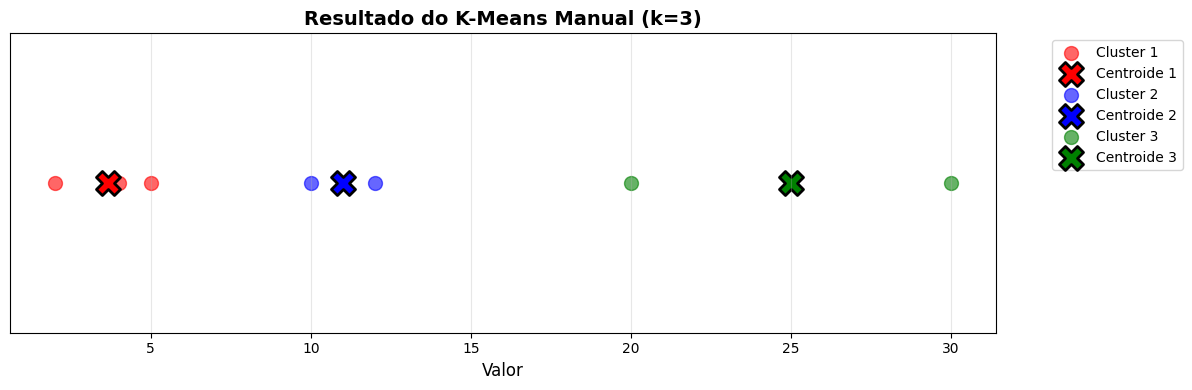

In [24]:
# Visualização dos clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot dos pontos coloridos por cluster
cores = ['red', 'blue', 'green']
for cluster_id in range(k):
    pontosCluster = x[clusters == cluster_id]
    plt.scatter(pontosCluster, [0] * len(pontosCluster), 
               c=cores[cluster_id], s=100, label=f'Cluster {cluster_id + 1}', alpha=0.6)
    
    # Marcar os centroides
    plt.scatter(centroides[cluster_id], 0, c=cores[cluster_id], 
               marker='X', s=300, edgecolors='black', linewidths=2,
               label=f'Centroide {cluster_id + 1}')

plt.xlabel('Valor', fontsize=12)
plt.title('Resultado do K-Means Manual (k=3)', fontsize=14, fontweight='bold')
plt.yticks([])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Exercício 3 — Convergência
Explique o que significa dizer que o K-Means convergiu. Qual é o critério de parada do algoritmo?

Exercício 4 — Diferença entre inicializações
Use o mesmo conjunto:
X = {1, 2, 3, 7, 8, 9, 15, 16, 18}, mas agora teste duas escolhas diferentes de centroides iniciais:
•   Caso A: {2, 8, 16}
•	Caso B: {1, 7, 15}
Compare os grupos finais.
O resultado é o mesmo?
O que isso mostra sobre a importância da inicialização?


Exercício 5 — Implementação simples (Use o Python apresentado em sala)
Implemente o algoritmo K-Means para 1 dimensão.
Use o conjunto:
X = {2, 4, 5, 10, 12, 20, 25, 30}, k = 3.
Mostre:
•	A evolução dos centroides a cada iteração
•	O agrupamento final


Exercício 6 — Implementação (Use o Python apresentado em sala)
Implemente o algoritmo e use como base de dados o arquivo de flores apresentado em sala (csv) com as 4 dimensões do arquivo: altura e largura da sépala e pétala. Considere k = 4.